# Загрузка библиотек

In [18]:
import pandas as pd
import requests
import urllib
import json
import seaborn as sns
from urllib.parse import urlencode
import requests
import matplotlib.pyplot as plt 

%matplotlib inline

# Задание 1

Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 

In [42]:
def retention(start, end, num_days):
    #Данные о времени регистрации
    df_reg = pd.read_csv('~/shared/problem1-reg_data.csv', sep = ';')
    #Данные о времени захода пользователей в игру
    df_log = pd.read_csv('~/shared/problem1-auth_data.csv', sep = ';')
    
    #Так как мы считаем по дням от даты регистрации, а не по 24-ым часовым интервалам, 
    #можно избавиться от времени и оставить только дату
    df_reg ['reg_ts'] = pd.to_datetime(df_reg.reg_ts, unit='s').dt.date
    df_log ['auth_ts'] = pd.to_datetime(df_log.auth_ts, unit='s').dt.date
    
    #соединим заходы пользователей с их датой регистрации 
    df_all = df_log.merge(df_reg, how = 'inner', on = 'uid') 
    #посчитаем разницу между датой захода и регистарцией
    df_all ['days'] = (df_all.auth_ts - df_all.reg_ts).dt.days.astype('int16')
    
    #фильтруем по интересующему интерварлу 
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    num_days= num_days
    
    df_ret = df_all[(df_all['reg_ts']>=start)&(df_all['reg_ts']<=end)&(df_all['days']<=num_days)]
    
    #считаем колличество уников по когортам 
    df_ret = df_ret.groupby(['reg_ts', 'days'], as_index=False) \
                       .agg({'uid': 'nunique'}) 
    
    #пивотим для удобства 
    retention = df_ret.pivot(index='reg_ts', columns='days', values='uid')
    
    #считаем ретеншн по отношению к первому дню и заполняем нули 
    cohort = retention.iloc[:,0]
    retention = retention.divide(cohort, axis=0)
    retention = retention.round(2).fillna(0)
    
    plt.figure(figsize=(24, 24))
    plt.title("Cohorts: User Retention")
    ax = sns.set(style="ticks")
    ax = sns.heatmap(retention, cmap=sns.cubehelix_palette(as_cmap=True), mask=retention.isnull(), annot=True, fmt=".0%",\
                     annot_kws={"size": 14})
    ax.xaxis.tick_top()

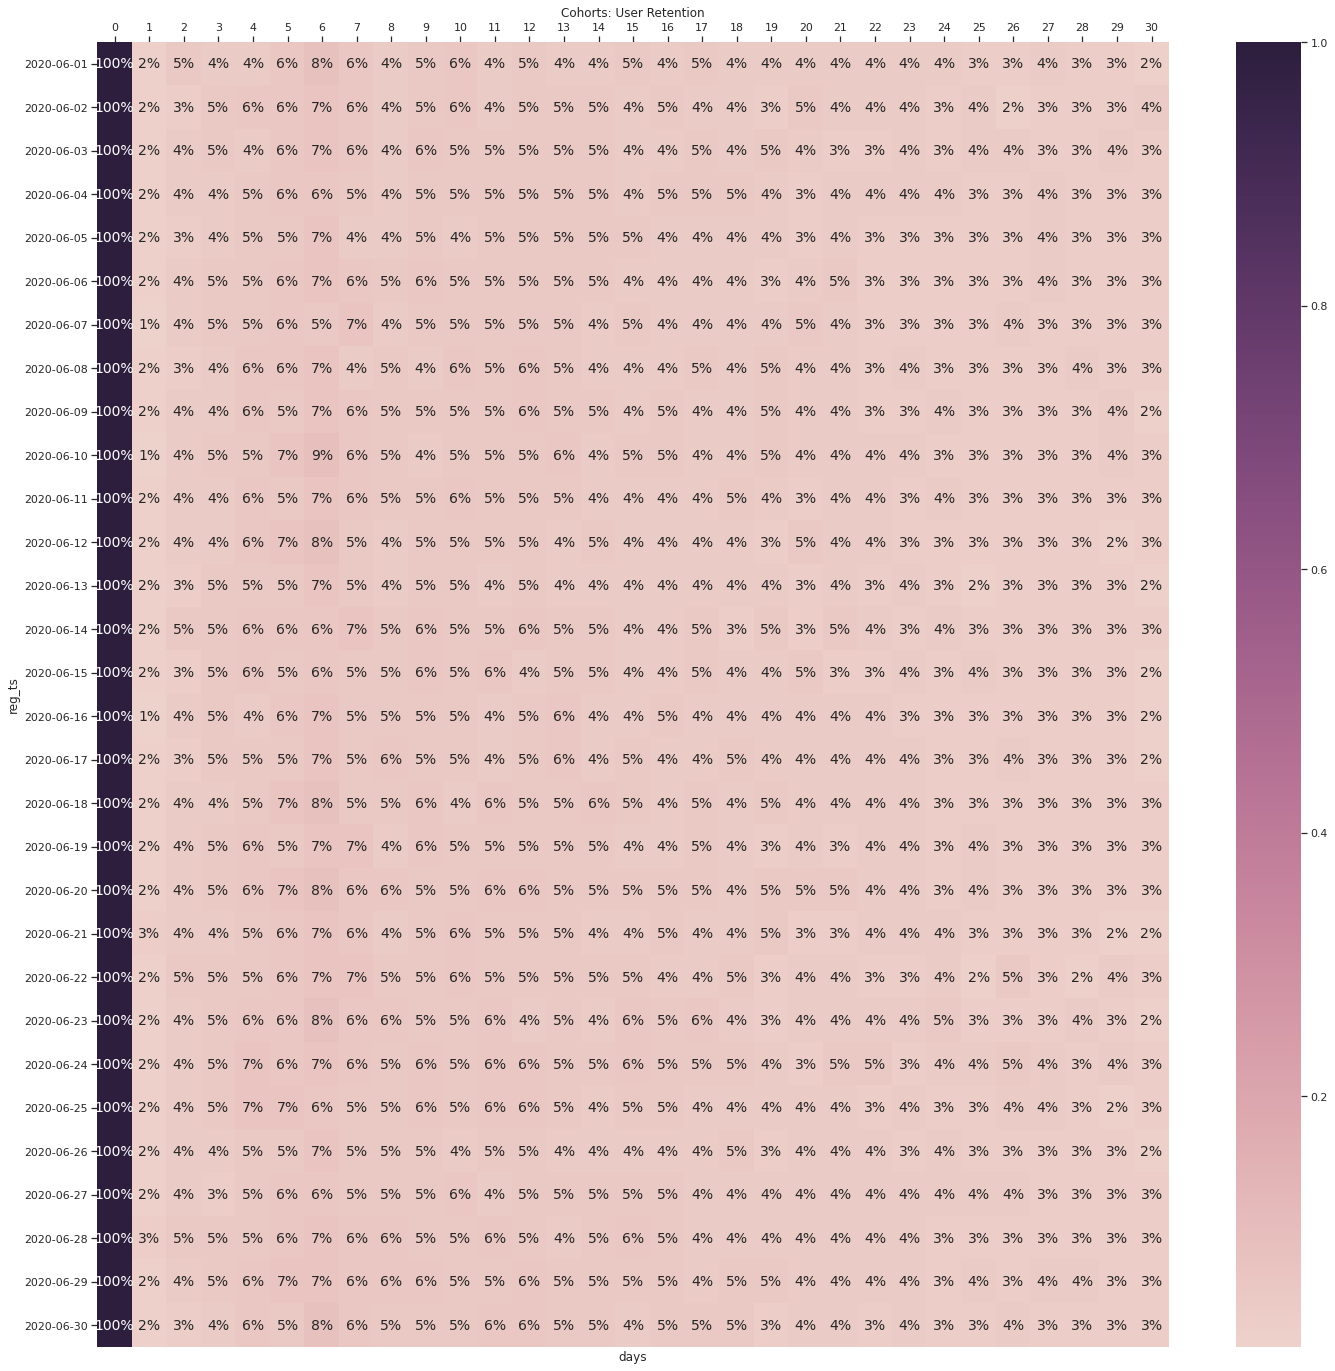

In [43]:
#Введите данные в функцию ('первая когорта', 'последняя когорта', кол-во дней с регистрации)
retention ('2020-06-01','2020-06-30', 30)